In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'dataset'
expressions = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
all_images = []
all_labels = []

LOAD IMAGES FROM FOLDER

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

TOTAL IMAGES

In [ ]:
for i , expression in enumerate(expressions):
    folder_path = os.path.join( dataset_path , expression )
    images , labels = load_images_from_folder( folder_path , i )
    all_images.extend(images)
    all_labels.extend(labels)
print(f"Total images: {len(all_images)}")

SOME SAMPLES OF IMAGES

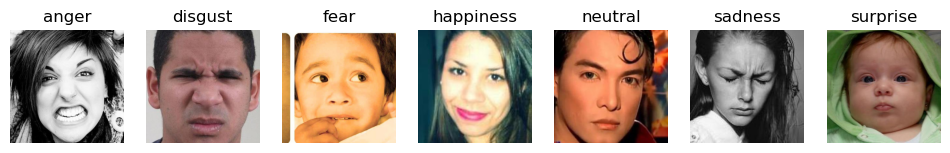

In [5]:
def show_samples(images , labels , expressions):
    plt.figure(figsize=(12,8))
    for i in range(len(expressions)):
        idx=labels.index(i)
        plt.subplot(2 , 7 , i+1)
        plt.imshow(cv2.cvtColor(images[idx] , cv2.COLOR_BGR2RGB))
        plt.title(expressions[i])
        plt.axis('off')
    plt.show()
show_samples(all_images, all_labels, expressions)
               

In [20]:
import pandas as pd

PREPROCESSING IMAGES 

In [11]:
def preprocess_image(image , size=(128,128)):
    image = cv2.resize(image , size)
    image = image / 255.0
    return image

In [12]:
preprocessed_images = [preprocess_image(img) for img in all_images]

In [13]:
preprocessed_path = 'Preprocessed'
os.makedirs(preprocessed_path, exist_ok=True)


ADDING PROCESSED IMAGES TO NEW PATH

In [14]:
for i, img in enumerate(preprocessed_images):
    expression = expressions[all_labels[i]]
    save_folder = os.path.join(preprocessed_path, expression)
    os.makedirs(save_folder, exist_ok=True)
    img_path = os.path.join(save_folder, f'img_{i:04d}.jpg')
    cv2.imwrite(img_path, img * 255)

TAKING OUT METADATA 

In [19]:
metadata = {'images_path' : [] , 'label': []}
for i , expression in enumerate(expressions):
    save_folder = os.path.join(preprocessed_path , expression)
    for filename in os.listdir(save_folder):
        img_path = os.path.join(save_folder , filename)
        if os.path.isfile(img_path):
            metadata['images_path'].append(img_path)
            metadata['label'].append(i)

df = pd.DataFrame(metadata)
df.to_csv('preprocessed_facial_expressions_metadata.csv', index=False)